<a href="https://colab.research.google.com/github/KaruDevs/AN-LISIS-DE-DATOS-DE-MIGRACI-N-CON-NUMPY-Y-PANDAS/blob/main/ConsolidadoM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install pandas plotly seaborn matplotlib

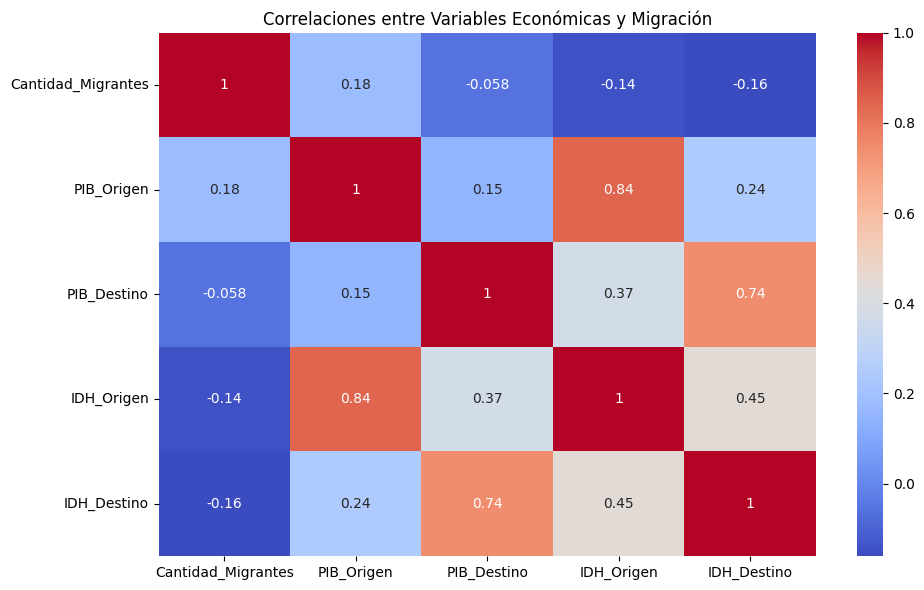

In [20]:
# analisis_migracion.py

import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('migracion.csv')

# Corrección de caracteres mal codificados - Eliminadas las líneas problemáticas
# df['Pais_Origen'] = df['Pais_Origen'].str.encode('latin1').str.decode('utf-8')
# df['Pais_Destino'] = df['Pais_Destino'].str.encode('latin1').str.decode('utf-8')
# df['Razon_Migracion'] = df['Razon_Migracion'].str.encode('latin1').str.decode('utf-8')

# Limpieza básica
df = df.drop_duplicates()
df = df.dropna(subset=['Pais_Origen', 'Pais_Destino', 'Cantidad_Migrantes'])
df['Cantidad_Migrantes'] = pd.to_numeric(df['Cantidad_Migrantes'], errors='coerce')

# Agrupamiento por país de origen
origen_total = df.groupby('Pais_Origen')['Cantidad_Migrantes'].sum().reset_index()

# Visualización interactiva con Plotly
fig_bar = px.bar(
    origen_total,
    x='Pais_Origen',
    y='Cantidad_Migrantes',
    title='Migrantes por País de Origen',
    labels={'Cantidad_Migrantes': 'Cantidad de Migrantes'},
    color='Cantidad_Migrantes',
    color_continuous_scale='Viridis'
)
fig_bar.show()

# Mapa de calor de correlaciones
variables = df[['Cantidad_Migrantes', 'PIB_Origen', 'PIB_Destino', 'IDH_Origen', 'IDH_Destino']]
plt.figure(figsize=(10, 6))
sns.heatmap(variables.corr(), annot=True, cmap='coolwarm')
plt.title('Correlaciones entre Variables Económicas y Migración')
plt.tight_layout()
plt.show()